# Classification Project

### Problem statement

Predict whether or not it will rain in Australia on a given day.

### Overview

The task is to predict whether or not it rains. Because there are only two options for the prediction - yes or no - this is a classification problem. 

The initial plan for this project is as follows:

1. Source the data 
2. Explore the data
3. Clean the data
5. Prepare the data for analysis
6. Create a decision tree to predict whether or not it will rain
7. Evaluate the model
8. Improve the model

This is my first independent data science project, and I am looking forward to actually applying the things I have learnt about. I am sure that I will end up searching for answers/asking for help a lot.

### Sourcing the data


The data for this project is sourced from [Kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package/home) and is based on the daily observations of weather stations across Australia.

The data is provided freely and openly by the Australian government, specifically the [Bureau of Meteorology](http://www.bom.gov.au/climate/data/). The data contains no personally identifying information or sensitive commmercial data.

### Exploring the data

In [1]:
# Importing necessary packages for data exploration and analysis

import pandas as pd # package for manipulating data and data frames

import seaborn as sns # package for visualising data

from sklearn.preprocessing import minmax_scale # Scaling package to make data more comparable

from sklearn.model_selection import train_test_split  # package for splitting the dataset so it can be tested

from sklearn.tree import DecisionTreeClassifier, export_graphviz # package for creating/exporting decision trees

from sklearn.metrics import classification_report, confusion_matrix # package to evaluate the model

import graphviz # package for visualising decision trees
import pydotplus # necessary package that works with graphviz

from sklearn.ensemble import RandomForestClassifier # Another classifier

from sklearn.metrics import roc_auc_score # A package for evaluating models

In [2]:
# Set command to show graphs in the notebook

%matplotlib inline 

In [3]:
# Loading the data from a .csv file into a data frame

weather_data = pd.read_csv("weatherAUS.csv")

In [4]:
weather_data.RainTomorrow.value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [47]:
# Gather basic information about the dataset

print(f"Rows: {weather_data.shape[0]}\nColumns: {weather_data.shape[1]}")

Rows: 142193
Columns: 24


With more than 140000 rows, I should have enough data to build useful models. 24 columns means that each row can be compared on multiple points, which will ensure a more precise classification.

The next thing to do is to explore the data further, to see if it needs cleaning and to see how much of the data is actually useful to me.

In [48]:
# Look at the first 10 lines of data

weather_data.head(10)

# This gives a quick glimpse of the data and its structure. 
# I could also have used .tail for the last rows, or .sample for a random selection.

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


"RainTomorrow" is the column name for the value that I am going to try and predict.

### Cleaning the data

Just from an initial look at the data, it's clear that there are many invalid or missing values which are shown as "NaN" (Not A Number) in the frame. 

The data will need to be cleaned before I analyse it, to avoid the missing data causing complications or anomalous models.

In [49]:
# Get the value counts of each column, sorted in ascending order.

weather_data.count().sort_values()

Sunshine          74377
Evaporation       81350
Cloud3pm          85099
Cloud9am          88536
Pressure9am      128179
Pressure3pm      128212
WindDir9am       132180
WindGustDir      132863
WindGustSpeed    132923
WindDir3pm       138415
Humidity3pm      138583
Temp3pm          139467
WindSpeed3pm     139563
Humidity9am      140419
RainToday        140787
Rainfall         140787
WindSpeed9am     140845
Temp9am          141289
MinTemp          141556
MaxTemp          141871
Date             142193
Location         142193
RISK_MM          142193
RainTomorrow     142193
dtype: int64

From the cell above, I can see that four columns - such as Sunshine - have a lot of missing values.

Based on the principle "garbage in, garbage out" - essentially that a predictive model is only as good as the data it is based on - I'm going to remove those columns entirely before beginning analysis.

It's important to be clear about this, as I am making assumptions about my data. In this case, the assumption is that I can remove those columns and still have a functioning model. This is a factor that might affect the accuracy or reliability of my model, and I need to be able to explain/justify it. 

These columns may have some correlation with the values I want to predict, but based on the large numbers of NaNs in those columns, I have decided that the potential benefits are outweighed by the potential risks of including a large amount of incomplete data in my analysis.

Any model which used those columns to predict whether it would rain or not would have limited applicability in a real context - it's clear that the measurements used to fill those columns are not consistently taken or recorded, so a model that requires those measurements to function correctly is less useful than one that does not.

In [50]:
# Drop the columns

weather_data = weather_data.drop(["Sunshine","Evaporation","Cloud3pm","Cloud9am"],axis=1)

Having removed the columns filled with NaNs, I should now look at the rows, and see if more cleaning can be done.

Because there are 142193 rows, I am confident that removing rows containing NaNs will still leave me with a significant dataset to analyse. I can then build my model on complete data, which should improve accuracy. 

In [51]:
# Drop any rows with NaNs in

weather_data = weather_data.dropna(how="any", axis=0)

Now my dataset should be clean and complete, with no missing values.

In [52]:
# Look at the dataset's shape again

print(f"Rows: {weather_data.shape[0]}\nColumns: {weather_data.shape[1]}")

# Check to see that all columns have the same number of values as the total rows

weather_data.count().sort_values()

Rows: 112925
Columns: 20


Date             112925
RainToday        112925
Temp3pm          112925
Temp9am          112925
Pressure3pm      112925
Pressure9am      112925
Humidity3pm      112925
Humidity9am      112925
WindSpeed3pm     112925
WindSpeed9am     112925
WindDir3pm       112925
WindDir9am       112925
WindGustSpeed    112925
WindGustDir      112925
Rainfall         112925
MaxTemp          112925
MinTemp          112925
Location         112925
RISK_MM          112925
RainTomorrow     112925
dtype: int64

All the columns have the correct number of values.

I'm also going to change the name of the RISK_MM column - it's not a problem as such, but it's using a different naming convention to other columns, and it will be neater if it is "RiskMM" instead.

In [53]:
weather_data.rename(columns={'RISK_MM':'RiskMM'},inplace=True)

### Visualising the data

I'm now going to take a look at the cleaned data, and see if any relationships are immediately clear.

The "RainTomorrow" column is the key one I'm interested in, as that's what I want to predict eventually.

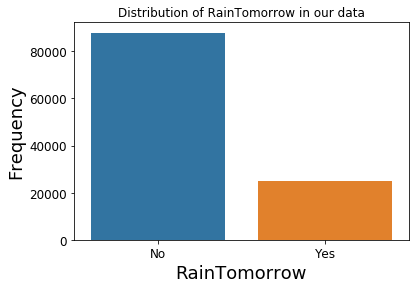

In [54]:
# Using seaborn to plot the distribution of RainTomorrow - how many times it rained vs. didn't.
RT_status = sns.countplot(x = 'RainTomorrow', data = weather_data)

# Making the graph more readable
RT_status.set_title('Distribution of RainTomorrow in our data')                                         
RT_status.set_ylabel('Frequency', fontsize = 18)
RT_status.set_xlabel('RainTomorrow', fontsize = 18)
RT_status.tick_params(labelsize = 12)

From the graph, it's clear that not raining was more frequent than rain. This is about right for Australia, and so acts as a basic sanity check.

The graph also highlights a potential problem - because there are so many more not-rain values than rain, this could throw the model off; high accuracy can be reached without forming a useful model, simply because "not rain" is much more likely. 

### Preparing the data for analysis

The data is clean, but I still need to do a few things before I can build the model. I need to make sure that all the data can be understood by the classifier, and that no information that the model shouldn't have is given to it.

In [55]:
# Drop the "RiskMM" column, as that is already a prediction of the amount of rain
# Including it will leak the answers to the model and result in over-fitting

weather_data = weather_data.drop("RiskMM",axis=1)

In [56]:
# Convert the binary categorial data (yes/no) into numeric so that the decision tree classifier can understand it

weather_data["RainToday"] = weather_data["RainToday"].map({"No":0, "Yes":1})
weather_data["RainTomorrow"] = weather_data["RainTomorrow"].map({"No":0, "Yes":1})

In [57]:
# Some of the columns are categorical, but allow more than a binary choice. 
# To make these interpretable by the classifier, I'm using one-hot encoding to create dummy variables.
# This will turn each categorical column into a set of columns, each one of which allows only a binary choice.

categorical = ["WindGustDir", "WindDir9am", "WindDir3pm"]

weather_data = pd.get_dummies(weather_data, columns=categorical)

In [58]:
# The location column contains lots of categorical data, but one-hot encoding it would add far too many columns.
# As we are concerned with the overall country, we can safely drop this one.

weather_data = weather_data.drop("Location", axis=1)

In [59]:
# The date column causes a similar problem, and would cause the classifier to error.
# However, I'm not going to remove it entirely because I think month might be relevant.

# Instead, I'm going to extract the month from each date string, and replace the date with the month as a number.

def date_to_month(str):
    # Function that extracts and returns the month as an integer from a date string
    return int(str.split("-")[1])


# Convert each date value to the month

weather_data.Date = weather_data.Date.apply(date_to_month)

# Rename the Date column to Month

weather_data.rename(columns={"Date": "Month"}, inplace=True)

In [60]:
# Examine the new shape of the dataset

print(f"Rows: {weather_data.shape[0]}\nColumns: {weather_data.shape[1]}")

Rows: 112925
Columns: 63


63 columns is a lot, so I'm going to check on them to make sure that it has all worked as intended.

In [61]:
# Get a sample of the data

weather_data.sample()

,Month,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
8636,8,0.7,15.7,0.0,28.0,6.0,11.0,63.0,39.0,1026.2,...,0,0,0,0,0,0,1,0,0,0


The new columns have worked as expected - each one contains only 1s or 0s.

It is possible that the numeric columns, because they have different scales, might affect the model. Pressure9am, for example, is generally around 1000, while Rainfall is always much closer to 0. To avoid the scaling differences biasing the model, I'm going to scale the data, converting each column's data into a relative range, so that values are seen as similar between columns.

In [62]:
def scale_data(dataset, features):
    # Function to scale data
    for feature in features:
        weather_data[feature] = minmax_scale(weather_data[[feature]])
        
numerics = ["MinTemp","MaxTemp", "Rainfall", "WindGustSpeed", "WindSpeed9am",
                     "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", 
                     "Pressure3pm", "Temp9am", "Temp3pm"]

scale_data(weather_data, numerics)

The scale function coerces all the numeric columns to measure their values on a scale from -1 to 1.

I also need to split the data into test and training sets, so that the model's validity and accuracy can be later tested.

In [63]:
# Identify the target variable, to ensure an even spread between the train and test

target = weather_data.RainTomorrow

# Create the train/test variables. The size of the test set is 0.2, or 20%. 
# 'RainTomorrow' is removed from the dataset so that the model can be built - otherwise the model would have the answers.

x_train, x_test, y_train, y_test = train_test_split(weather_data.drop("RainTomorrow",axis=1), target, test_size=0.2,random_state=123)

# The random_state parameter above sets the random seed, so that my model can be replicated exactly.
# This is important for checking and sharing the model, so that anomalous models and results can be understood.

### Creating a decision tree

Now that I have prepared data and a training set, I can create the actual classifying model. I'm going to use the default algorithm in sklearn, which is the CART algorithm. For this project, I'm not going to experiment with others, as this is my first attempt with machine learning, but I plan to in the future.

In [64]:
# Create the decision tree classifier 

tree_model = DecisionTreeClassifier(random_state=123,max_depth=3)

In [65]:
# train the tree on the training data set

tree_model.fit(x_train, y_train )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

Now the model has been trained, and can be used to give predictions. The next step is to look at how accurate it is, and actually make predictions.

### Evaluate the model

I'm going to start by just visualising the model. One of the benefits of decision trees is that they are easier for humans to understand, so a visualisation should give us a clear idea of how reasonable the tree is.

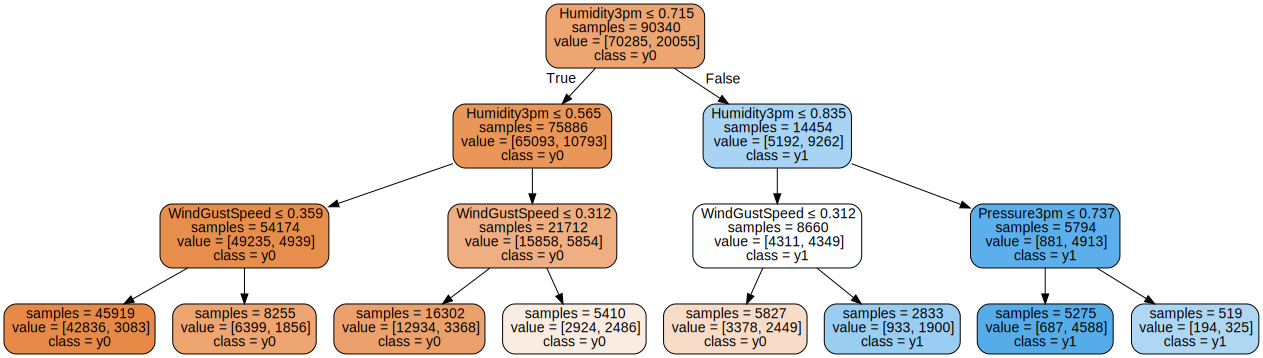

In [66]:
graphviz.Source(export_graphviz(tree_model,feature_names=x_train.columns,
                                    filled=True, 
                                    rounded=True,impurity=False, special_characters = True,class_names = True ))

I used the graphviz package to visualise the tree - it creates a human-readable chart showing the separate decisions taken to reach a decision.

On my first attempts, the tree would not visualise in a readable format, and I had to fix several problems. Firstly, the graphviz package I installed through PIP wasn't working; I had to install a separate Graphviz program outside Python, so that the package could function correctly. After that, I discovered that the tree visualisation took a long time to render, and was hard to understand. In order to fix this problem, I added a max_depth parameter to the tree model:

`tree_model = DecisionTreeClassifier(random_state=123,max_depth=3)`

This parameter means that the model only makes three levels of decisions. This makes the tree simpler, if less fitted to the data. That might sound like a trade-off - accuracy for intelligibility - but it's actually a good thing. If the model has the ability to make a much higher number of decisions, then it will "over-fit" to the training data, and be less accurate on the test, or other unfamiliar, data. It will make increasingly specific choices that eventually will just be picking up on features in the training data that aren't significant or important, and then those decisions will lead to misleading choices with new data.

Now I can use the tree (trained on the training data) to predict if it will rain tomorrow based on the testing data.

In [67]:
# create an array of predictions and display it.

predictions = tree_model.predict(x_test)

'predictions' is an array of 1s and 0s - 1 if the model predicts rain, 0 if it doesn't. 

In order to check the validity of these predictions, I need to compare them with the RainTomorrow field stored in y_test.

In [68]:
# Create a new dataframe from the predictions

test_results = pd.DataFrame(data=y_test)

# add the predictions to the dataframe

test_results["Predicted"] = predictions

# for neatness's sake, rename the RainTomorrow column

test_results.rename(columns={"RainTomorrow": "Actual"}, inplace=True)


In [69]:
# Take a look at the dataset, to check the columns have worked and to see if patterns are evident.

test_results.sample(20)

,Actual,Predicted
115319,0,0
67536,0,0
115236,1,1
34948,0,0
137016,0,0
27985,0,0
82565,0,0
69747,0,0
9679,0,0
68109,0,0


The sample will be different every time the cell above is run, but it's clear that the model is not perfect - even in a small sample of 20 rows, I can see mismatches.

I can look at the total counts of 0s and 1s in both actual and predicted, to see how closely they match.

In [70]:
# Actual counts

test_results["Actual"].value_counts()

0    17621
1     4964
Name: Actual, dtype: int64

In [71]:
# Predicted counts

test_results["Predicted"].value_counts()

0    20406
1     2179
Name: Predicted, dtype: int64

The model clearly isn't perfect - it over-predicts not raining, and under-predicts rain. That's okay - a perfect or near-perfect model suggests over-fitting.  

I can use a confusion matrix to get an overall measure of accuracy and a better understanding of how well the model actually works.

In [72]:
# Create and display a confusion matrix
 
pd.DataFrame(confusion_matrix(test_results["Actual"], test_results["Predicted"]), index= [0,1], columns= [0,1])

,0,1
0,17162,459
1,3244,1720


A confusion matrix shows how many accurate predictions were made, splitting this into four values. This is shown in the output above.

The top-left value shows the number of actual 0s correctly predicted as 0s, and the top right shows the number of 1s incorrectly predicted as 0. Similarly, on the lower row, the first number is the number of 1s predicted (incorrectly) as 0, and the second is the number of correctly-predicted actual 1s. 

This shows that the model successfully predicts not-rain, but is not as successful on days when it does rain. It's a lot easier to predict not-rain, as that's the most common result; if the model just always predicted not-rain, it would be accurate much of the time. However, a model that just predicts the most common result each time is not useful. 

A classification report gives more metrics to evaluate a model's success.

In [73]:
# Create and display a classification report

print(classification_report(test_results["Actual"], test_results["Predicted"]))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90     17621
           1       0.79      0.35      0.48      4964

   micro avg       0.84      0.84      0.84     22585
   macro avg       0.82      0.66      0.69     22585
weighted avg       0.83      0.84      0.81     22585



The classification report shows the same problem.

Precision is a measurement of how many predictions of a specific type were correct - out of the number of times the model predicted rain, what proportion of those rain predictions were correct. 

The model has 0.84 as a precision score for not-rain. It predicted not-rain 17554 times, and 84% of the time, those predictions were correct. 0.8 is the precision score for predicting rain - out of 5031 predictions, 80% were correct.

However, precision is not enough on its own. I also need to consider recall.

Recall is a measurement of how many predictions of a specific type were correct, compared to how many times the thing being predicted occurred. 

The model has a recall score for not-rain of 0.98. That means that, out of all the days it did not rain, the model predicted not-rain 98% of the time. That's a good score. However, the recall score for rain is only 0.35 - the model only predicted rain correctly on 35% of the days it actually rained. 

To make a useful model, this recall number needs to be higher. 

# Improving the model

In order to try and build a better model, I'm going to use another algorithm - the random forest classifier. 

RandomForest runs several different decision trees on the same data, each time looking at a different subset of factors. Instead of the output from one decision tree, you get the best answer, collated from lots of different trees.

In [74]:
# Create a RandomForest classifier that will create 20 trees

tree_model2 = RandomForestClassifier(n_estimators=20, random_state=123,max_depth=10)

# Train the classifier on the data

tree_model2.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [75]:
# Use the model on the test data

forest_predictions = tree_model2.predict(x_test)

In [76]:
# Create a new dataframe from the predictions

forest_results = pd.DataFrame(data=y_test)

# add the predictions to the dataframe

forest_results["Predicted"] = forest_predictions

# for neatness's sake, rename the RainTomorrow column

forest_results.rename(columns={"RainTomorrow": "Actual"}, inplace=True)

In [77]:
# Create and display a confusion matrix for the forest results
 
pd.DataFrame(confusion_matrix(forest_results["Actual"], forest_results["Predicted"]), index= [0,1], columns= [0,1])

,0,1
0,16968,653
1,2799,2165


In [78]:
# Create and display a classification report

print(classification_report(forest_results["Actual"], forest_results["Predicted"]))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     17621
           1       0.77      0.44      0.56      4964

   micro avg       0.85      0.85      0.85     22585
   macro avg       0.81      0.70      0.73     22585
weighted avg       0.84      0.85      0.83     22585



From the cells above, I can see that the random forest has produced a more useful model overall. The low recall score of 0.35 has improved to 0.44. That's not a huge improvement, but it is a noticeable one. The other recall value and the precision scores have slightly decreased, but the 1 recall score is the most noticeable change.

In order to more directly compare the models, I am going to calculate the ROC/AUC score. This score is a measure of how well a model can distinguish between distinct values - in this case, 0 and 1. The closer the ROC/AUC score is to 1, the better the model.

It's the best model to use for situations like this, where there is an imbalance between the number of values for each case - in this data, not-rain is far more frequent than rain. 

In [79]:
# Calculate the score for the first model

print("Tree model:", roc_auc_score(test_results["Actual"], test_results["Predicted"]))

# Calculate the score for the forest model

print("Forest:" ,roc_auc_score(forest_results["Actual"], forest_results["Predicted"]))

Tree model: 0.6602231486943207
Forest: 0.6995410768897505


There's a definite improvement in the ROC/AUC score, and that means that the RandomForest is the better model. It's not as good an improvement or final result as I would like, but it is a positive change. 

Throughout this project, I've experiment with various tools/techniques, with differing levels of success. I've cleaned and analysed data effectively, even if my eventual model wasn't as strong as I hoped. I now feel more confident with my data skills, but I also have areas for improvement. Moving on from this project, I'm going to focus on ways to evaluate and improve models to increase their applicability.